In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
import pandas as pd
import plotly.graph_objects as go

# 1. 설정할 disruption frequencies와 recovery periods
recovery_periods = [6.5, 13, 26, 52, 104]
disruption_frequencies = [0.5, 1, 3, 6, 12]

# 2. 데이터를 저장할 리스트 생성
dual_profit_data = []
inventory_profit_data = []
wholesale_profit_data = []

# 3. Dual-sourcing 데이터 수집
for recovery in recovery_periods:
    row = []
    for disruption in disruption_frequencies:
        file_name = f"Data_Dual-sourcing_{disruption}_{recovery}_0.1.csv"
        try:
            df = pd.read_csv(file_name)
            profit = df['profit'].iloc[-1]  # 마지막 tick의 profit 사용
            profit = profit / 200
            row.append(profit)
        except FileNotFoundError:
            row.append(None)
    dual_profit_data.append(row)

# 4. Inventory-strategy 데이터 수집
for recovery in recovery_periods:
    row = []
    for disruption in disruption_frequencies:
        file_name = f"Data_inventory-strategy_{disruption}_{recovery}_0.1.csv"
        try:
            df = pd.read_csv(file_name)
            profit = df['profit'].iloc[-1]  # 마지막 tick의 profit 사용
            profit = profit / 200 
            row.append(profit)
        except FileNotFoundError:
            row.append(None)
    inventory_profit_data.append(row)

# 5. Wholesale 데이터 수집
for recovery in recovery_periods:
    row = []
    for disruption in disruption_frequencies:
        file_name = f"Data_Wholesale_{disruption}_{recovery}_0.1.csv"
        try:
            df = pd.read_csv(file_name)
            profit = df['profit'].iloc[-1]  # 마지막 tick의 profit 사용
            profit = profit / 200
            row.append(profit)
        except FileNotFoundError:
            row.append(None)
    wholesale_profit_data.append(row)


# 6. Surface Plot 생성
fig = go.Figure()

# Dual-sourcing Profit Surface
fig.add_trace(go.Surface(
    z=dual_profit_data,
    x=disruption_frequencies,
    y=recovery_periods,
    colorscale='Blues',
    name='Dual-sourcing Profit',
    showscale=False
))

# Inventory-strategy Profit Surface
fig.add_trace(go.Surface(
    z=inventory_profit_data,
    x=disruption_frequencies,
    y=recovery_periods,
    colorscale='Greens',
    name='Inventory-strategy Profit',
    showscale=False
))

# Wholesale Profit Surface
fig.add_trace(go.Surface(
    z=wholesale_profit_data,
    x=disruption_frequencies,
    y=recovery_periods,
    colorscale='Oranges',
    name='Wholesale Profit',
    showscale=False
))

# 7. 그래프 레이아웃 설정
fig.update_layout(
    title="Profit Comparison: Dual-sourcing vs Inventory-strategy vs Wholesale",
    scene=dict(
        xaxis_title='Disruption Frequency (Lambda)',
        yaxis_title='Recovery Period (mu)',
        zaxis_title='Profit'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# 8. 그래프 표시
fig.show()

# 9. HTML로 저장
fig.write_html("profit_surface_plot_comparison.html")


### Recovery를 26(2주)로 고정하고, disruption-frequency 영향 확인

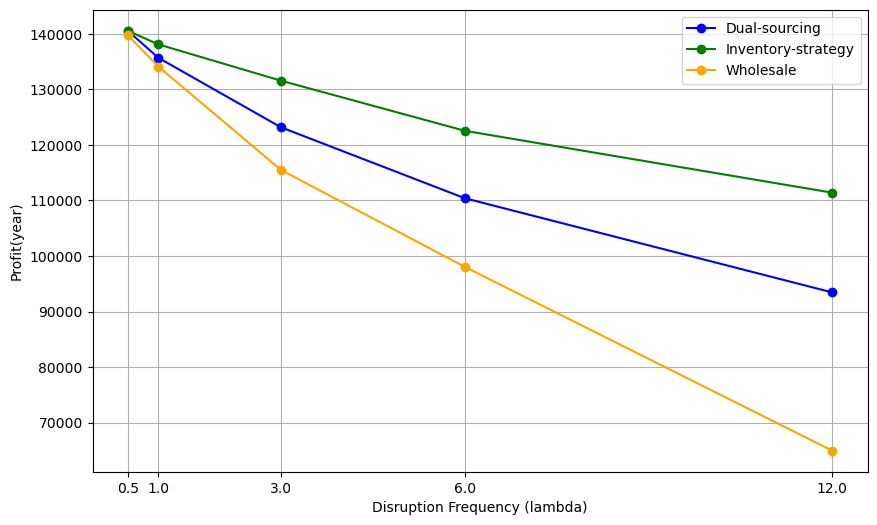

In [8]:
# disruption-frequency 값을 설정 (1 ~ 12)
disruption_frequencies = [0.5, 1, 3, 6, 12]

# 각 disruption-frequency에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200 
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

for freq in disruption_frequencies:
    df_wholesale = pd.read_csv(f"Data_Wholesale_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200
    wholesale_profits.append(wholesale_profit)

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(disruption_frequencies, dual_profits, label='Dual-sourcing', marker='o', linestyle = '-', color = 'b')
plt.plot(disruption_frequencies, inventory_profits, label='Inventory-strategy', marker='o', linestyle = '-', color = 'g')
plt.plot(disruption_frequencies, wholesale_profits, label='Wholesale', linestyle = '-', color = 'orange', marker = 'o')

# 그래프 레이블 및 제목 설정
#plt.title('Profit vs Disruption Frequency')
plt.xlabel('Disruption Frequency (lambda)')
plt.ylabel('Profit(year)')
plt.legend()
plt.grid(True)
plt.xticks(disruption_frequencies)
plt.show()

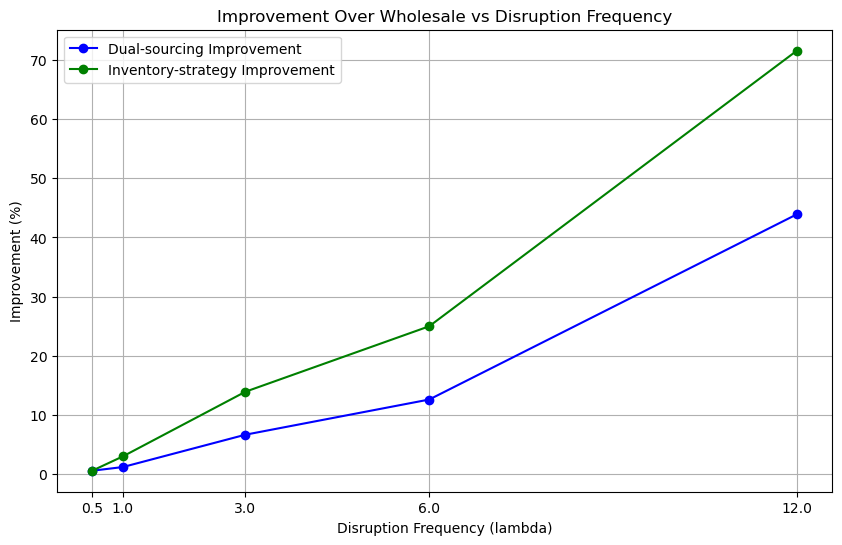

In [15]:
# disruption-frequency 값을 설정 (1 ~ 12)
disruption_frequencies = [0.5, 1, 3, 6, 12]

# 각 disruption-frequency에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200 
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

# Wholesale 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_wholesale = pd.read_csv(f"Data_Wholesale_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200
    wholesale_profits.append(wholesale_profit)

# 개선도 계산
dual_improvements = []
inventory_improvements = []

for i in range(len(disruption_frequencies)):
    wholesale_profit = wholesale_profits[i]
    dual_improvement = ((dual_profits[i] - wholesale_profit) / wholesale_profit) * 100
    inventory_improvement = ((inventory_profits[i] - wholesale_profit) / wholesale_profit) * 100
    dual_improvements.append(dual_improvement)
    inventory_improvements.append(inventory_improvement)

# 개선도 Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(disruption_frequencies, dual_improvements, label='Dual-sourcing Improvement', marker='o', linestyle='-', color='b')
plt.plot(disruption_frequencies, inventory_improvements, label='Inventory-strategy Improvement', marker='o', linestyle='-', color='g')

# 그래프 레이블 및 제목 설정
plt.title('Improvement Over Wholesale vs Disruption Frequency')
plt.xlabel('Disruption Frequency (lambda)')
plt.ylabel('Improvement (%)')
plt.legend()
plt.grid(True)
plt.xticks(disruption_frequencies)
plt.show()


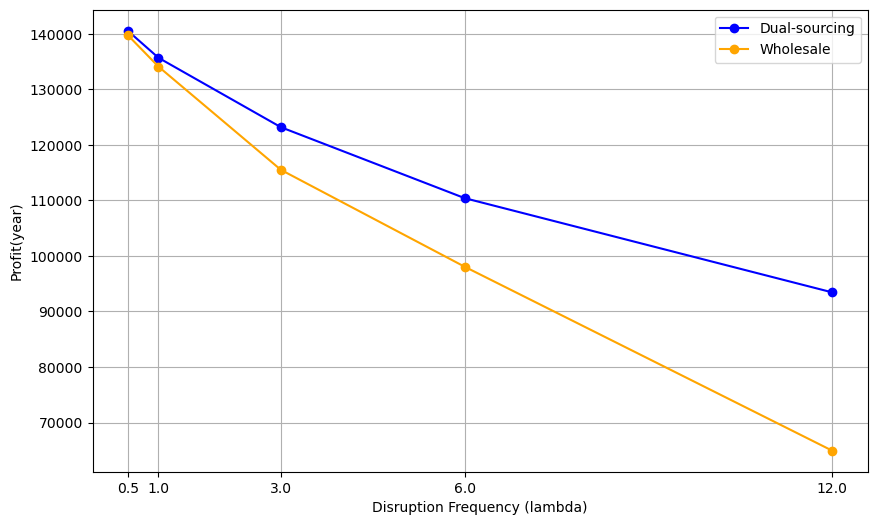

In [9]:
# disruption-frequency 값을 설정 (1 ~ 12)
disruption_frequencies = [0.5, 1, 3, 6, 12]

# 각 disruption-frequency에 대한 profit을 저장할 리스트
dual_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200 
    dual_profits.append(dual_profit)

for freq in disruption_frequencies:
    df_wholesale = pd.read_csv(f"Data_Wholesale_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200
    wholesale_profits.append(wholesale_profit)

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(disruption_frequencies, dual_profits, label='Dual-sourcing', marker='o', linestyle = '-', color = 'b')
plt.plot(disruption_frequencies, wholesale_profits, label='Wholesale', linestyle = '-', color = 'orange', marker = 'o')

# 그래프 레이블 및 제목 설정
#plt.title('Profit vs Disruption Frequency')
plt.xlabel('Disruption Frequency (lambda)')
plt.ylabel('Profit(year)')
plt.legend()
plt.grid(True)
plt.xticks(disruption_frequencies)
plt.show()

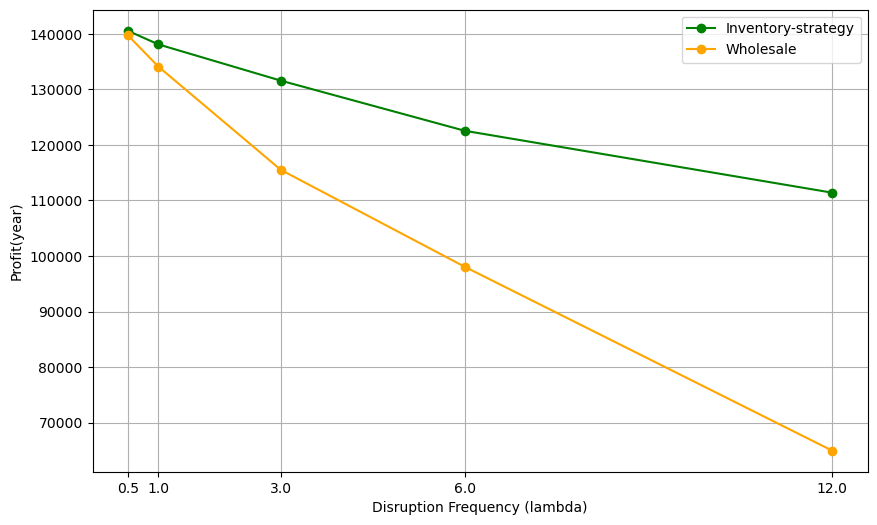

In [10]:
# disruption-frequency 값을 설정 (1 ~ 12)
disruption_frequencies = [0.5, 1, 3, 6, 12]

# 각 disruption-frequency에 대한 profit을 저장할 리스트
inventory_profits = []
wholesale_profits = []


# Inventory-strategy 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

for freq in disruption_frequencies:
    df_wholesale = pd.read_csv(f"Data_Wholesale_{freq}_26_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200
    wholesale_profits.append(wholesale_profit)

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(disruption_frequencies, inventory_profits, label='Inventory-strategy', marker='o', linestyle = '-', color = 'g')
plt.plot(disruption_frequencies, wholesale_profits, label='Wholesale', linestyle = '-', color = 'orange', marker = 'o')

# 그래프 레이블 및 제목 설정
#plt.title('Profit vs Disruption Frequency')
plt.xlabel('Disruption Frequency (lambda)')
plt.ylabel('Profit(year)')
plt.legend()
plt.grid(True)
plt.xticks(disruption_frequencies)
plt.show()

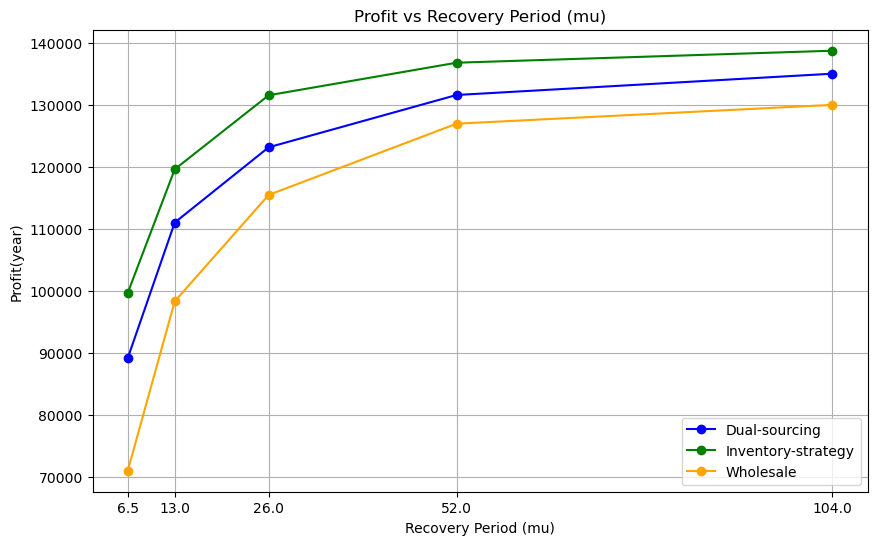

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# recovery 값 설정 (13, 26, 52, 104)
recovery_values = [6.5, 13, 26, 52, 104]

# 각 recovery에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

for mu in recovery_values:
    df_wholesale = pd.read_csv(f"Data_wholesale_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200 
    wholesale_profits.append(wholesale_profit)

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(recovery_values, dual_profits, label='Dual-sourcing', marker='o', linestyle = '-', color = 'b')
plt.plot(recovery_values, inventory_profits, label='Inventory-strategy', marker='o', linestyle = '-', color = 'g')
plt.plot(recovery_values, wholesale_profits, label='Wholesale', linestyle = '-', color = 'orange', marker = 'o')
# 그래프 레이블 및 제목 설정
plt.title('Profit vs Recovery Period (mu)')
plt.xlabel('Recovery Period (mu)')
plt.ylabel('Profit(year)')
plt.legend()
plt.grid(True)
plt.xticks(recovery_values)
plt.show()

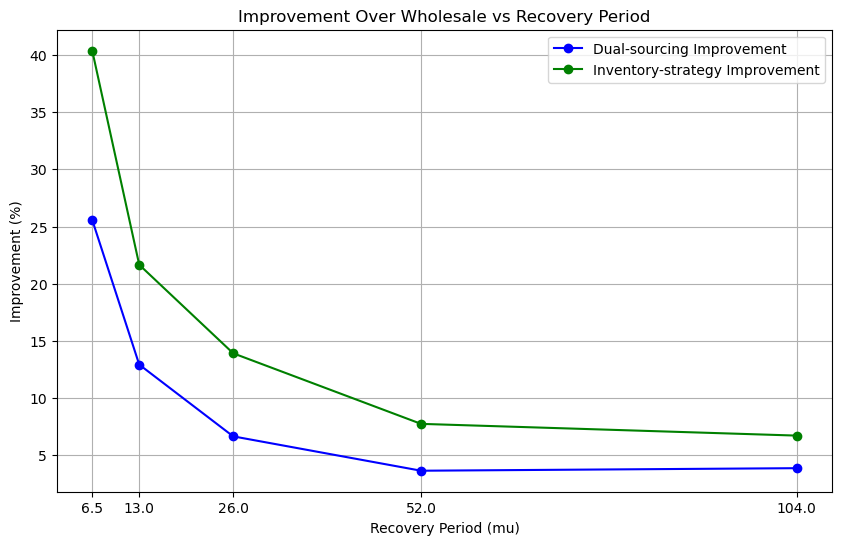

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# recovery 값 설정 (13, 26, 52, 104)
recovery_values = [6.5, 13, 26, 52, 104]

# 각 recovery에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

# Wholesale 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_wholesale = pd.read_csv(f"Data_Wholesale_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200 
    wholesale_profits.append(wholesale_profit)

# 개선도 계산
dual_improvements = []
inventory_improvements = []

for i in range(len(recovery_values)):
    wholesale_profit = wholesale_profits[i]
    dual_improvement = ((dual_profits[i] - wholesale_profit) / wholesale_profit) * 100
    inventory_improvement = ((inventory_profits[i] - wholesale_profit) / wholesale_profit) * 100
    dual_improvements.append(dual_improvement)
    inventory_improvements.append(inventory_improvement)

# 개선도 Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(recovery_values, dual_improvements, label='Dual-sourcing Improvement', marker='o', linestyle='-', color='b')
plt.plot(recovery_values, inventory_improvements, label='Inventory-strategy Improvement', marker='o', linestyle='-', color='g')

# 그래프 레이블 및 제목 설정
plt.title('Improvement Over Wholesale vs Recovery Period')
plt.xlabel('Recovery Period (mu)')
plt.ylabel('Improvement (%)')
plt.legend()
plt.grid(True)
plt.xticks(recovery_values)
plt.show()


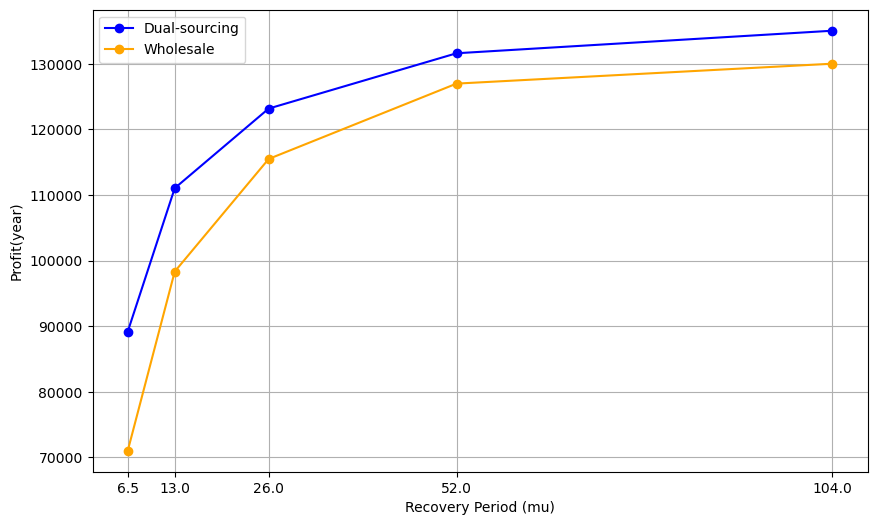

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# recovery 값 설정 (13, 26, 52, 104)
recovery_values = [6.5, 13, 26, 52, 104]

# 각 recovery에 대한 profit을 저장할 리스트
dual_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200
    dual_profits.append(dual_profit)


for mu in recovery_values:
    df_wholesale = pd.read_csv(f"Data_wholesale_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200 
    wholesale_profits.append(wholesale_profit)

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(recovery_values, dual_profits, label='Dual-sourcing', marker='o', linestyle = '-', color = 'b')
plt.plot(recovery_values, wholesale_profits, label='Wholesale', linestyle = '-', color = 'orange', marker = 'o')
# 그래프 레이블 및 제목 설정
#plt.title('Profit vs Recovery Period (mu)')
plt.xlabel('Recovery Period (mu)')
plt.ylabel('Profit(year)')
plt.legend()
plt.grid(True)
plt.xticks(recovery_values)
plt.show()

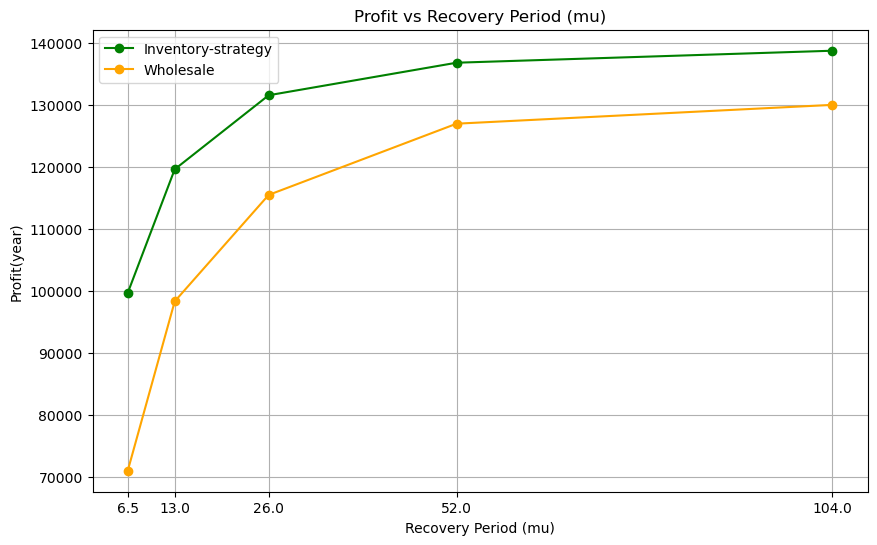

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# recovery 값 설정 (13, 26, 52, 104)
recovery_values = [6.5, 13, 26, 52, 104]

# 각 recovery에 대한 profit을 저장할 리스트
inventory_profits = []
wholesale_profits = []


# Inventory-strategy 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

for mu in recovery_values:
    df_wholesale = pd.read_csv(f"Data_wholesale_3_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200 
    wholesale_profits.append(wholesale_profit)

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(recovery_values, inventory_profits, label='Inventory-strategy', marker='o', linestyle = '-', color = 'g')
plt.plot(recovery_values, wholesale_profits, label='Wholesale', linestyle = '-', color = 'orange', marker = 'o')
# 그래프 레이블 및 제목 설정
plt.title('Profit vs Recovery Period (mu)')
plt.xlabel('Recovery Period (mu)')
plt.ylabel('Profit(year)')
plt.legend()
plt.grid(True)
plt.xticks(recovery_values)
plt.show()

## Recovery가 6.5일 때, disruption-frquency 영향 조사 

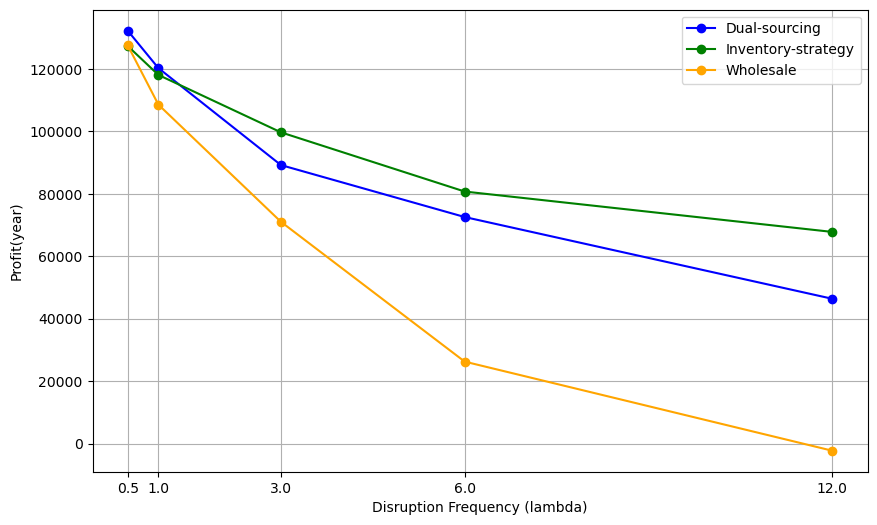

In [23]:
# disruption-frequency 값을 설정 (1 ~ 12)
disruption_frequencies = [0.5, 1, 3, 6, 12]

# 각 disruption-frequency에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_{freq}_6.5_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200 
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_{freq}_6.5_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

for freq in disruption_frequencies:
    df_wholesale = pd.read_csv(f"Data_Wholesale_{freq}_6.5_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200
    wholesale_profits.append(wholesale_profit)

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(disruption_frequencies, dual_profits, label='Dual-sourcing', marker='o', linestyle = '-', color = 'b')
plt.plot(disruption_frequencies, inventory_profits, label='Inventory-strategy', marker='o', linestyle = '-', color = 'g')
plt.plot(disruption_frequencies, wholesale_profits, label='Wholesale', linestyle = '-', color = 'orange', marker = 'o')

# 그래프 레이블 및 제목 설정
#plt.title('Profit vs Disruption Frequency')
plt.xlabel('Disruption Frequency (lambda)')
plt.ylabel('Profit(year)')
plt.legend()
plt.grid(True)
plt.xticks(disruption_frequencies)
plt.show()

127511.75
108539.0
71028.0
26248.0
-2281.0
[np.float64(3.682523375296782), np.float64(10.779213001778157), np.float64(25.570127273751194), np.float64(176.3913441024078), np.float64(2133.000876808417)]


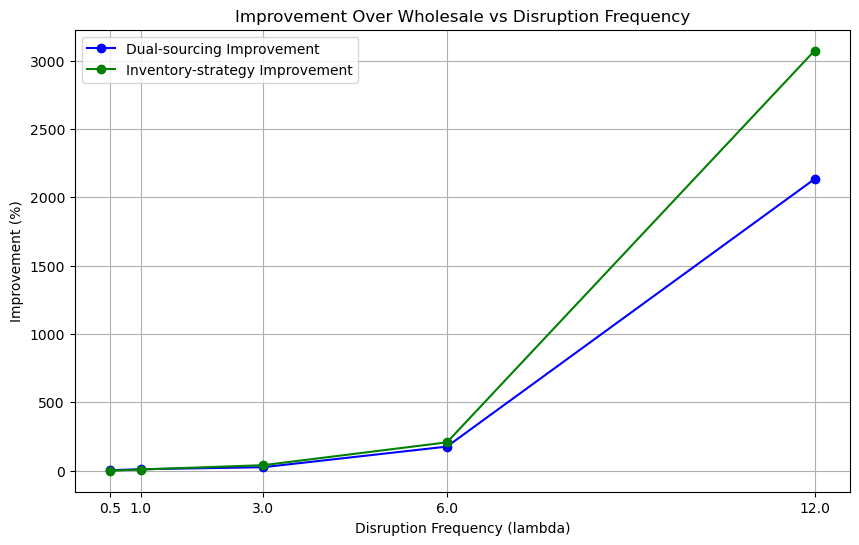

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# disruption-frequency 값을 설정 (1 ~ 12)
disruption_frequencies = [0.5, 1, 3, 6, 12]

# 각 disruption-frequency에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_{freq}_6.5_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200 
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_{freq}_6.5_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

# Wholesale 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_wholesale = pd.read_csv(f"Data_Wholesale_{freq}_6.5_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200
    wholesale_profits.append(wholesale_profit)

# 개선도 계산
dual_improvements = []
inventory_improvements = []

for i in range(len(disruption_frequencies)):
    wholesale_profit = wholesale_profits[i]
    print(wholesale_profit)
    dual_improvement = ((dual_profits[i] - wholesale_profit) / abs(wholesale_profit)) * 100
    inventory_improvement = ((inventory_profits[i] - wholesale_profit) / abs(wholesale_profit)) * 100
    dual_improvements.append(dual_improvement)
    inventory_improvements.append(inventory_improvement)

print(dual_improvements)
# 개선도 Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(disruption_frequencies, dual_improvements, label='Dual-sourcing Improvement', marker='o', linestyle='-', color='b')
plt.plot(disruption_frequencies, inventory_improvements, label='Inventory-strategy Improvement', marker='o', linestyle='-', color='g')

# 그래프 레이블 및 제목 설정
plt.title('Improvement Over Wholesale vs Disruption Frequency')
plt.xlabel('Disruption Frequency (lambda)')
plt.ylabel('Improvement (%)')
plt.legend()
plt.grid(True)
plt.xticks(disruption_frequencies)
plt.show()

## Disruption-frquency가 0.5일 때의 Recovery 변화 조사 

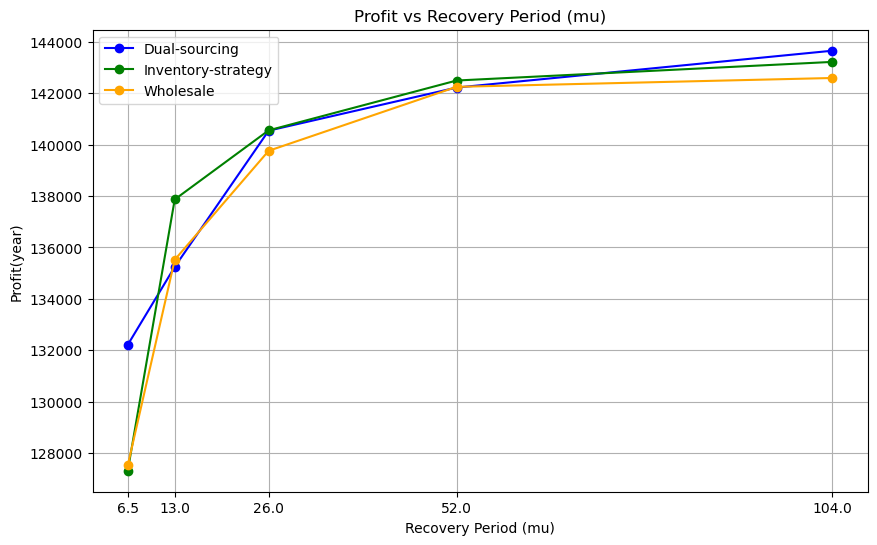

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# recovery 값 설정 (13, 26, 52, 104)
recovery_values = [6.5, 13, 26, 52, 104]

# 각 recovery에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_0.5_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_0.5_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

for mu in recovery_values:
    df_wholesale = pd.read_csv(f"Data_wholesale_0.5_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200 
    wholesale_profits.append(wholesale_profit)

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(recovery_values, dual_profits, label='Dual-sourcing', marker='o', linestyle = '-', color = 'b')
plt.plot(recovery_values, inventory_profits, label='Inventory-strategy', marker='o', linestyle = '-', color = 'g')
plt.plot(recovery_values, wholesale_profits, label='Wholesale', linestyle = '-', color = 'orange', marker = 'o')
# 그래프 레이블 및 제목 설정
plt.title('Profit vs Recovery Period (mu)')
plt.xlabel('Recovery Period (mu)')
plt.ylabel('Profit(year)')
plt.legend()
plt.grid(True)
plt.xticks(recovery_values)
plt.show()

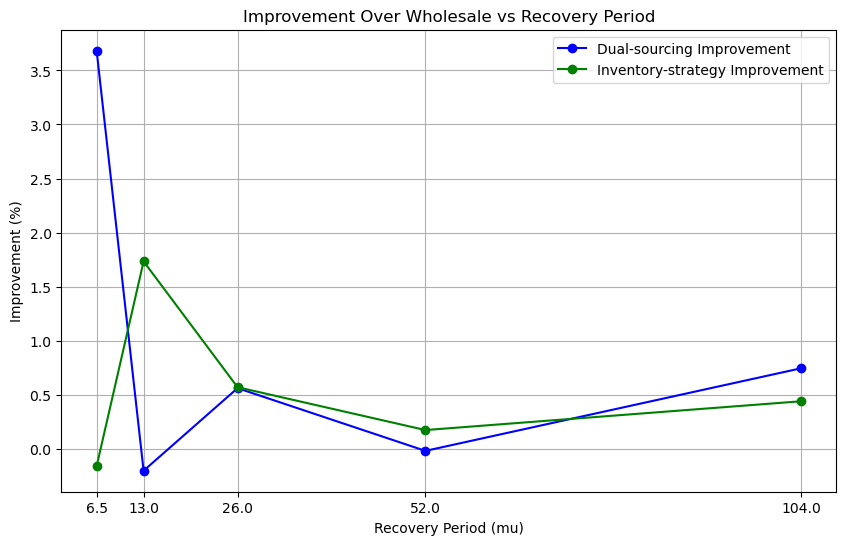

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# recovery 값 설정 (6.5, 13, 26, 52, 104)
recovery_values = [6.5, 13, 26, 52, 104]

# 각 recovery에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_0.5_{mu}_0.1.csv")
    dual_profit = df_dual['profit'].iloc[-1]
    dual_profit = dual_profit / 200
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_0.5_{mu}_0.1.csv")
    inventory_profit = df_inventory['profit'].iloc[-1]
    inventory_profit = inventory_profit / 200
    inventory_profits.append(inventory_profit)

# Wholesale 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_wholesale = pd.read_csv(f"Data_wholesale_0.5_{mu}_0.1.csv")
    wholesale_profit = df_wholesale['profit'].iloc[-1]
    wholesale_profit = wholesale_profit / 200
    wholesale_profits.append(wholesale_profit)

# 개선도 계산
dual_improvements = []
inventory_improvements = []

for i in range(len(recovery_values)):
    wholesale_profit = wholesale_profits[i]
    if wholesale_profit != 0:  # 절대값 기반 개선도 계산
        dual_improvement = ((dual_profits[i] - wholesale_profit) / abs(wholesale_profit)) * 100
        inventory_improvement = ((inventory_profits[i] - wholesale_profit) / abs(wholesale_profit)) * 100
    else:
        dual_improvement = None
        inventory_improvement = None

    dual_improvements.append(dual_improvement)
    inventory_improvements.append(inventory_improvement)

# 개선도 Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(recovery_values, dual_improvements, label='Dual-sourcing Improvement', marker='o', linestyle='-', color='b')
plt.plot(recovery_values, inventory_improvements, label='Inventory-strategy Improvement', marker='o', linestyle='-', color='g')

# 그래프 레이블 및 제목 설정
plt.title('Improvement Over Wholesale vs Recovery Period')
plt.xlabel('Recovery Period (mu)')
plt.ylabel('Improvement (%)')
plt.legend()
plt.grid(True)
plt.xticks(recovery_values)
plt.show()
